# **Title of Project**

 

##Detection of Red Wine Quality

## **Objective**

It is a classification problem to Check the quality of Red Wine based on the various parameters .

Our Target Variable is scale of Quality of wine by which we can train the model to give the better prediction.

To classify the target variable whether it is good(1) or bad(0) quality of wine.

For modelling, We are using Random Forest Classifer and Support Vector Machine

## **Data Source**

Dataset is taken from the Kaggle .

URL : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)



## **Import Library**

In [1]:
# imported these modules to perform operations with data 
import pandas as pd 
import numpy as np

# For Visualizations
import matplotlib.pyplot as plt



## **Import Data**

In [2]:
# read the csv file using pandas
original_data = pd.read_csv("/content/winequality-red.csv")

# Copy the original data into df variable
df = original_data.copy()

In [3]:
# displayed the first five row of csv file 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# displayed how many row and columns in a dataset  
df.shape

(1599, 12)

## **Describe Data**

In [5]:
# gives the detail information about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Fortunately ,all the data in the form of numeric values So there is no Null value or missing value in dataset

In [7]:
# all the data display in dataframe format 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## **Data Visualization**

In [8]:
# Display the range of quality of wine in number and its counts
data1= df['quality'].value_counts().sort_index()
data1


3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

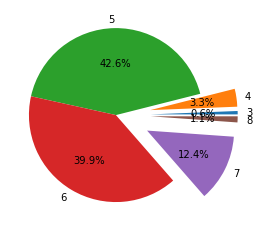

In [9]:
# percentage of types of classes in quality
data = [10,53,681,638,199,18]
labels = '3','4','5','6','7','8'
explode = (0.4,0.4,0,0,0.4,0.4)
fig,ax = plt.subplots()

ax.pie(data,labels=labels,explode =explode,autopct='%1.1f%%');

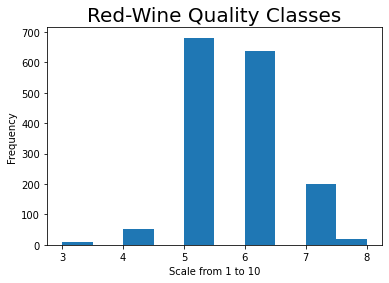

In [10]:
# histogram of red-wine quality classes divided into scale from 1 to 10
fig, ax = plt.subplots();
plt.title("Red-Wine Quality Classes",size=20)

plt.xlabel('Scale from 1 to 10')
df['quality'].plot(kind='hist');


From the above diagram,it is clear that there are total 6  wines quality classes present in the dataset and remaining 4 scales are not present.




## **Data Preprocessing**

In [11]:
# total count of type of classes in dataset
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
# classifying the wine quality based on good or bad based on its quality
# Bad or 0 (if wine quality lies in the range of (0,6) inclusive)
# Good or 1 (if wine quality lies in the range of (7,8) inclusive)

df['quality'] = df['quality'].apply(lambda x :1 if x > 6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
# count of numerical value in terms of 0 and 1
print(df['quality'].value_counts())


0    1382
1     217
Name: quality, dtype: int64


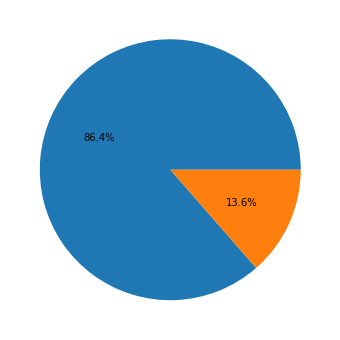

In [14]:
# pie chart of percentage of good or bad quality type of class
fig = plt.figure(figsize=(10,6))

plt.pie(df['quality'].value_counts(),autopct='%1.1f%%')
plt.show()


There are total 86.4 % of bad quality
There are total 13.6% of good quality

In [15]:
# separating the dependant and independant variables
x =df.iloc[:,:-1].values
y =df.iloc[:,-1].values

In [16]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [17]:
y

array([0, 0, 0, ..., 0, 0, 0])

## **Define Target Variable (y) and Feature Variables (X)**

In [18]:
# Columns name in the dataset 
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
# Feature Variable or independant variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [20]:
# number of rows and columns in dataset
X.shape

(1599, 11)

In [21]:
# Target Variable or dependent variable
y = df['quality']

In [22]:
y.shape

(1599,)

## **Train Test Split**

In [23]:
# Import the module of Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split( X ,y,train_size = 0.7,random_state =252)

In [24]:
# Size of training and testing dataset

print("X-train shapes :",X_train.shape)
print("X-test shape : ",X_test.shape)
print("y-train shape :",y_train.shape)
print("y-test shape : ",y_test.shape)

X-train shapes : (1119, 11)
X-test shape :  (480, 11)
y-train shape : (1119,)
y-test shape :  (480,)


## **Modeling**

###Random Forest Classifier && Support Vector Machine

In [25]:
# Random Forest Clasifier Modelling
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model

RandomForestClassifier(random_state=0)

In [26]:
# fit the model
rf_model.fit(X_train,y_train)



RandomForestClassifier(random_state=0)

In [27]:
# Support vector machine modelling
from sklearn.svm import SVC
svm_model = SVC()
svm_model

SVC()

In [28]:
# fit the svm model
svm_model.fit(X_train,y_train)

SVC()

## **Model Evaluation**

In [29]:
# size of test data for target variable
y_test.shape

(480,)

In [30]:
# prediction of trained model of random forest clasifier 
y1_pred = rf_model.predict(X_test)

In [31]:
# model evaluation for random forest classifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# confusion matrix of rf
print(confusion_matrix(y_test,y1_pred))


[[398   9]
 [ 43  30]]


In [32]:
# classification report of rf
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       407
           1       0.77      0.41      0.54        73

    accuracy                           0.89       480
   macro avg       0.84      0.69      0.74       480
weighted avg       0.88      0.89      0.88       480



In [33]:
# Accuracy of random forest
print(accuracy_score(y_test,y1_pred))

0.8916666666666667


In [34]:
# prediction of trained model of Support vector machine  
y2_pred = svm_model.predict(X_test)

In [35]:
# model evaluation for Support vector machine
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y2_pred))


[[407   0]
 [ 73   0]]


In [36]:
# classification report of svm
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       407
           1       0.00      0.00      0.00        73

    accuracy                           0.85       480
   macro avg       0.42      0.50      0.46       480
weighted avg       0.72      0.85      0.78       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Accuracy of SVM
print(accuracy_score(y_test,y2_pred))

0.8479166666666667


## **Prediction**

In [38]:
# Prediction report for Random forest
print("Total prediction : ",len(y1_pred))
print("Correct Prediction :",sum(y1_pred == y_test))
print("Incorrect Prediction : ",sum(y1_pred!=y_test))
print("Accuracy : ",sum(y1_pred == y_test)*100 / len(y1_pred))

Total prediction :  480
Correct Prediction : 428
Incorrect Prediction :  52
Accuracy :  89.16666666666667


In [39]:
# Prediction report for Support vector machine
print("Total prediction : ",len(y2_pred))
print("Correct Prediction :",sum(y2_pred == y_test))
print("Incorrect Prediction : ",sum(y2_pred!=y_test))
print("Accuracy : ",sum(y2_pred == y_test)*100 / len(y2_pred))

Total prediction :  480
Correct Prediction : 407
Incorrect Prediction :  73
Accuracy :  84.79166666666667


## **Explaination**

From the above modelling of dataset,Random Forest Classifer gives more accurate result than the support vector machine.

Random Forest Algorithm gives 89.16% accuracy 
Support  Vector Machine gives 84.79% accuracy

1. we created a ML classifiers for classifying wine as Good or Bad.
2. The datset has  1599 records and 12 fields.
3. RF are more accurate to determine the quality of wine in the dataset.
